In [1]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# 3.2 $\quad$ Conceptos iniciales de optimización

### Conceptos

Nuestro objetivo es **mimimizar/maximizar $f_0(x|w)$** sujeto a $f_i(x|w) \leq b_i$,   $\qquad i= 1,...,m$

donde:

- $x = (x_1, x_2,..., x_n)$ son las variables

- $w = (w_1, w_2,..., w_n)$ son los parámetros

- $f_0: \mathbb{R}^n \rightarrow \mathbb{R}$  es la función objetivo

- $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ son las restricciones

**Solución**: $w^*$ son los parámetros, de entre todos los vectores que cumplen las restricciones, que hace que $f_0(x | w^*)$ tenga el valor mínimo/máximo.

---

**EJEMPLO: OPTIMIZACIÓN DE UNA CARTERA**

- *variables:*     retornos esperados de cada activo
- *parámetros:*    cantidades o pesos que invierto en cada activo
- *restricciones:* presupuesto total, max/min cantidad invertida en un activo, retorno mínimo de la cartera
- *objetivo:*      riesgo o volatilidad

**EJEMPLO: MACHINE LEARNING**

- *variables:*     datos de entrada
- *parámetros:*    parámetros del modelo (ejemplo: conexiones entre neuronas de una red neuronal)
- *restricciones:* límites de los parámetros (ejemplo: las respuestas neuronales solo pueden ser positivas)
- *objetivo:*      función de error de la predicción de tu modelo frente al valor esperado

Hay muchos tipos de problemas de optimización. La optimización de una cartera, o el Machine Learning, no son más que dos ejemplos. Igualmente, este tipo de problemas pueden ser muy difíciles de resolver por varias razones:

- No se puede plantear el problema de forma apropiada

- No podemos encontrar la solución en un tiempo razonable

- Requiere muchos recursos de computación

**Excepciones**: algunos problemas se pueden resolver de manera eficaz y fiable:

- Problemas lineales utilizando mínimos cuadrados ordinarios (OLS)

- Optimización convexa

## 1. Problemas lineales con mínimos cuadrados

Este método se utiliza principalmente para problemas de ajuste de modelos, especialmente en estadística y análisis de datos. El objetivo es minimizar la suma de los cuadrados de las diferencias (errores) entre los valores observados y los valores predichos por un modelo. Es ampliamente utilizado en regresión lineal para estimar los coeficientes de un modelo lineal.

$$\underset{w}{\min} \|Xw - y\|_2^2$$

donde $X$ es la matriz de diseño, que contiene las características de entrada de tus datos. Cada fila $x_i$ corresponde a una observación, y cada columna a una variable independiente. Por otro lado, $y$ es el vector de valores objetivo de tus datos (variable dependiente o target). Es el valor que se espera que tu modelo prediga.

Existe una solución analítica:

$w^* = (X^TX)^{-1} X^T y$

Para realizar regresiones lineales en python existen varias librerías:

- polyfit de Numpy

- linregress de Scipy

- **OLS de Statsmodel**

- LinearRegression de scikit-learn



En el apéndice de esta sección se muestran dos ejemplos de optimización de problemas mediante métodos lineales.

## 2. Optimización Convexa

Se muestra en la siguiente figura un ejemplo de optimización. Hay que encontrar los máximos (picos de las montañas) o mínimos (valles). En este problema, encontrar el mínimo/máximo global es una tarea extremadamente compleja.

<div style="text-align: center;">
    <img src="../imgs/no-convexo.PNG" width="350" height="250" />
</div>

Sin embargo, no todos los problemas son así de complicados. La **optimización convexa** es un subcampo de la optimización matemática que estudia cómo minimizar o maximizar una función convexa sobre un conjunto convexo.

<img src="../imgs/convexa.jpg" alt="CAPM" width="400"/>

Las ventajas de los problemas de optimización convexa incluyen:

- **Solución Óptima Global**: Cualquier mínimo local es también un mínimo global, lo que asegura que la solución encontrada es la mejor posible.

- **Amplia Aplicabilidad**: Los problemas de optimización convexa son relevantes en muchos campos, como la economía, la ingeniería, el machine learning y la investigación operativa.

- **Simplicidad de Implementación**: Los algoritmos para resolver problemas convexos son sencillos de implementar.

- **Eficiencia Computacional**: Los algoritmos para resolver problemas convexos son generalmente eficientes y bien entendidos, lo que permite soluciones rápidas y confiables.

Los problemas de optimización de carteras de activos financieros son **PROBLEMAS DE OPTIMIZACIÓN CONVEXA**:

1. **Función Objetivo Convexa**:
   - En la optimización de carteras, como en el modelo de Markowitz, la función objetivo suele ser minimizar el riesgo (varianza o desviación estándar) o maximizar el rendimiento esperado.
   - La varianza (riesgo) es una función cuadrática de los pesos de los activos, que es convexa por definición.
   
<br>

2. **Restricciones Convexas**:
    - Las restricciones comunes, como la suma de los pesos igual a 1 y las restricciones de no-negatividad, son lineales (afines). Estas restricciones son convexas, lo que significa que el conjunto de soluciones posibles (el espacio factible) es un conjunto convexo.

Para más información sobre optimización convexa podéis estudiar el curso de Stanford [Convex Optimization](https://www.youtube.com/playlist?list=PL3940DD956CDF0622)

## Apéndice: Ejemplos de modelos lineales

### Ejemplo: CAPM

Un ejemplo clásico de optimización mediante mínimos cuadrados en finanzas es la regresión lineal para estimar el modelo de valoración de activos de capital (CAPM, por sus siglas en inglés). Aunque este modelo se verá en profundidad en próximos temas, ahora nos debemos quedar con la idea de la optimización.

El CAPM es un modelo utilizado para determinar la rentabilidad esperada de un activo, tomando en cuenta el riesgo y el tiempo valor del dinero. El modelo establece que la rentabilidad de un activo es una función lineal del rendimiento de un mercado más amplio.

<div style="text-align: center;">
<img src="../imgs/capm.png" alt="CAPM" width="500"/>
</div>

In [33]:
import numpy as np
import pandas as pandas
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [34]:
tickers=['META', '^IXIC']
precios_df = yf.download(tickers, start='2018-01-01', end='2023-11-30', period='M')['Adj Close']
retornos_df = np.log(precios_df).diff().dropna()

[*********************100%%**********************]  2 of 2 completed


In [35]:
# split dependent and independent variable
X = retornos_df['^IXIC']
y = retornos_df['META']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()

alpha = results.params.iloc[0]
beta = results.params.iloc[1]
print(f'La beta es: {beta:.2f}')

La beta es: 1.23


Comprobamos si coincide con la beta que nos da yahoo finance:


<img src="../imgs/beta-meta.png" alt="CAPM" width="700"/>


Con la siguiente figura, vamos a comprobar si el modelo se está adaptando correctamente a los datos. Vamos a pintar el comportamiento de `META` frente al mercado, representado por el Nasdaq Composite Index (^IXIC). En la figura vemos cómo nuestro modelo lineal (curva naranja), que intenta estudiar el rendimiento del activo $R_i$, se adapta lo mejor posible a los datos (puntos azules), que representan el mercado $R_m$.

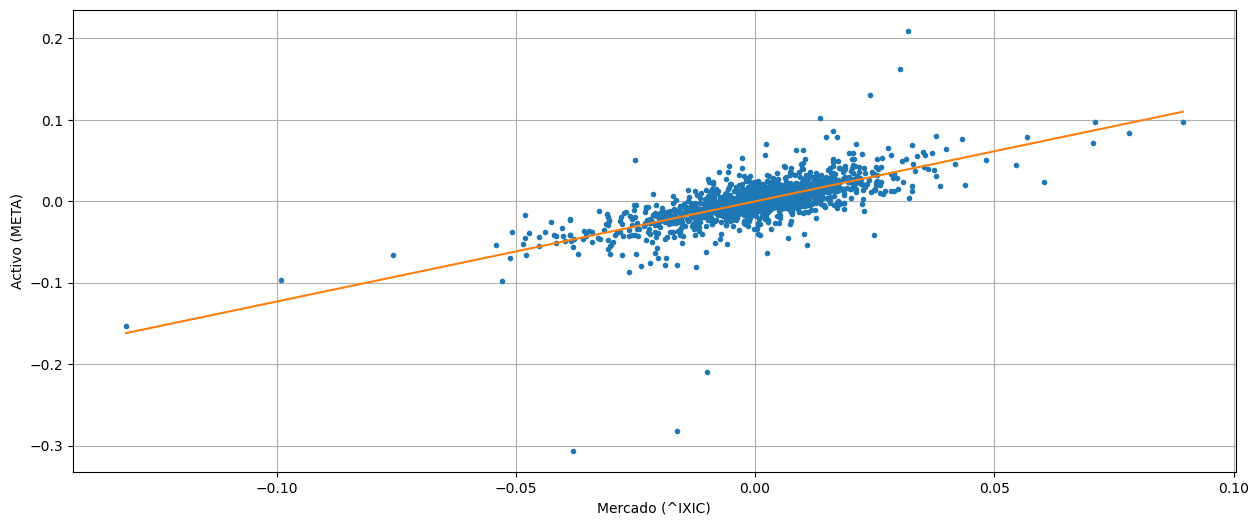

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(X, y, '.')
plt.plot([X.min(), X.max()], [alpha + beta*X.min(), alpha + beta*X.max()])
plt.xlabel("Mercado (^IXIC)")
plt.ylabel("Activo (META)")
plt.grid()
plt.show()

Cuando los puntos azules están por encima del modelo (curva naranja), el activo `META` está por encima del mercado. Cuando están por debajo, el activo está por debajo del mercado. La `BETA` define la pendiente.

Vamos a hacer el mismo procedimiento sobre un ETF de oro físico: iShares Physical Gold GBP Hedged ETC (`IGLG.L`).

In [37]:
tickers=['META', 'IGLG.L', '^IXIC']
precios_df = yf.download(tickers, start='2018-01-01', end='2023-11-30', period='M')['Adj Close']
retornos_df = np.log(precios_df).diff().dropna()

[*********************100%%**********************]  3 of 3 completed


In [38]:
# split dependent and independent variable
X = retornos_df['^IXIC']
y = retornos_df['IGLG.L']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()

alpha = results.params.iloc[0]
beta = results.params.iloc[1]
print(f'La beta es: {beta:.2f}')

La beta es: 0.10


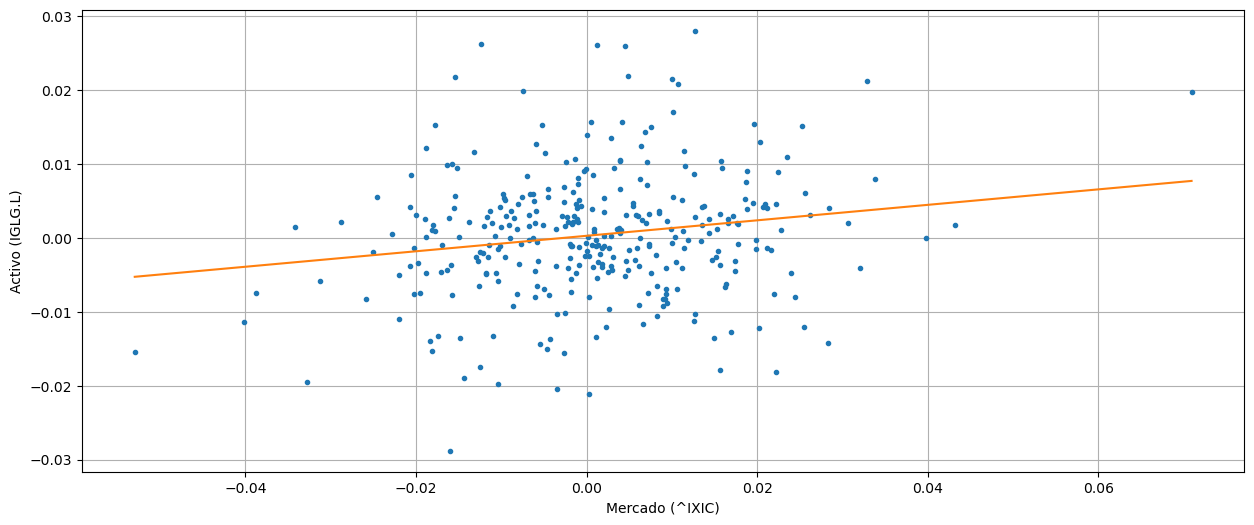

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(X, y, '.')
plt.plot([X.min(), X.max()], [alpha + beta*X.min(), alpha + beta*X.max()])
plt.xlabel("Mercado (^IXIC)")
plt.ylabel("Activo (IGLG.L)")
plt.grid()
plt.show()

Comparando las dos figuras tenemos mucha información:

- La recta naranja (el modelo) define la relación "promedio" entre el activo y el mercado.

- La `BETA` define la pendiente del modelo. Una beta menor que uno representa un crecimiento menor que el mercado, una beta igual a uno representa un crecimiento como el mercado y una beta mayor que uno representa un crecimiento mayor que el mercado.

- Los puntos azules representan el comportamiento del activo frente al mercado. Cuando los puntos azules están por encima de la recta, el activo ha estado por encima de lo esperado y viceversa.

- Los puntos azules están más o menos "pegados" a la recta naranja según el caso. Cuando los puntos están más pegados, significa que el modelo se está aproximando mejor o, en otras palabras, hay una correlación más alta entre el activo y el mercado. En el caso contrario, cuando los puntos están más alejados, significa que el modelo se está aproximando peor, es decir, hay menos correlación entre el activo y el mercado.

In [40]:
# Comprobemos la última conclusión
retornos_df.corr()

# META: 0.666128
# ^TNX: 0.178414

,IGLG.L,META,^IXIC
IGLG.L,1.000000,0.113053,0.178414
META,0.113053,1.000000,0.666128
^IXIC,0.178414,0.666128,1.000000


### Ejemplo: California Housing

In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
data = pd.DataFrame(housing.data, columns=housing.feature_names)
target = housing.target

In [12]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Para hacerlo más sencillo, vamos a hacer una regresión lineal de un sólo atributo con el precio de la vivienda. Vamos a coger el ingreso medio del núcleo familiar `MedInc`. 

In [13]:
X1 = sm.add_constant(data["MedInc"])
model = sm.OLS(target, X1)
results = model.fit()

alpha = results.params.iloc[0]
beta = results.params.iloc[1]
print(f'La beta es: {beta:.2f}')

La beta es: 0.42


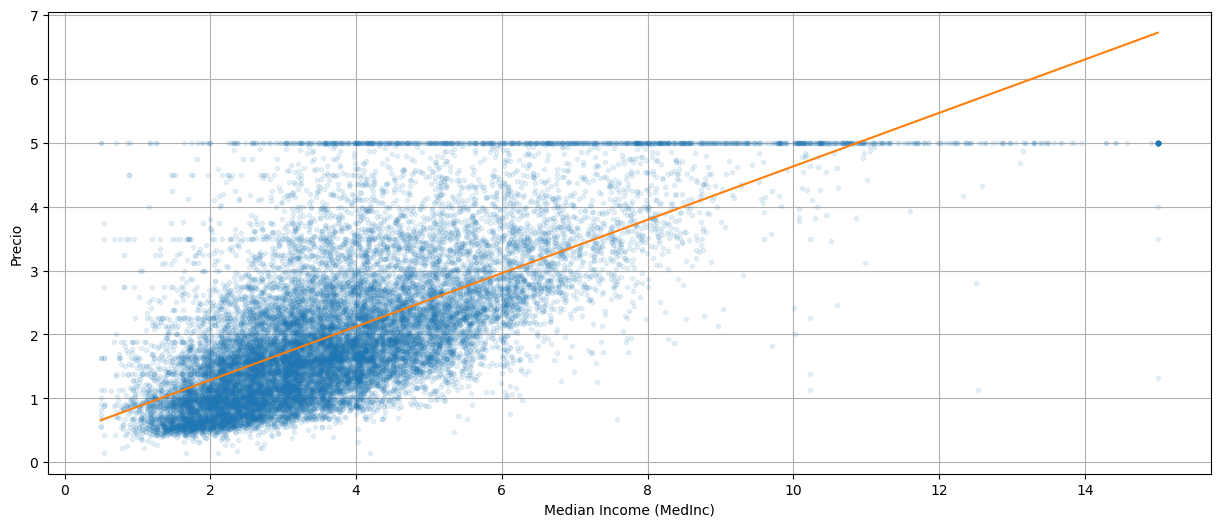

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(data["MedInc"], target, '.', alpha=0.1)
plt.plot([data["MedInc"].min(), data["MedInc"].max()], [alpha + beta*data["MedInc"].min(), alpha + beta*data["MedInc"].max()])
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Precio")
plt.grid()
plt.show()

Volvemos a obtener la misma información:

- La recta naranja (el modelo) define la relación "promedio" entre el ingreso medio de la población y el precio de la vivienda.

- La `BETA` define la pendiente del modelo. Una beta menor que uno representa un crecimiento menor del precio de la vivienda respecto que el ingreso medio, una beta igual a uno representa un crecimiento como el ingreso medio y una beta mayor que uno representa un crecimiento mayor del precio de la vivienda que el ingreso medio.

- Los puntos azules representan el comportamiento del precio de la vivienda frente al ingreso medio de los habitantes de esa vivienda. Cuando los puntos azules están por encima de la recta, el precio de la vivienda ha estado por encima de lo esperado y viceversa.

- Los puntos azules están más o menos "pegados" a la recta naranja según el caso. Cuando los puntos están más pegados, significa que el modelo se está aproximando mejor o, en otras palabras, hay una correlación más alta entre el precio de la vivienda y el ingreso medio de la población. En el caso contrario, cuando los puntos están más alejados, significa que el modelo se está aproximando peor.